In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const
absor1 = pd.read_csv('/Users/huihaoz/Downloads/GeometricA_Earth_HighCloud_UltraRes1.dat', comment = '#', delimiter='\s+')
absor2 = pd.read_csv('/Users/huihaoz/Downloads/mktrans_zmnq_16_15.dat', comment = '#', delimiter='\s+')
pts=pd.read_csv('/Users/huihaoz/Downloads/PT_PES2.txt', sep=',')
pts["Teq"] = (pts.STK * ((pts.SRadiusSun *  const.R_sun/(2*pts.SMAAU * const.au)))**(1/2) * (1-0.3)**(0.25))
pts.iloc[14,8]=249.7 #TRAPPIST-1 e
# Split a Python List into Chunks using For Loops
our_list = np.array(absor1.albH2O[:1079300])
chunked_list = list()
chunk_size = 251*2*5
for i in range(0, len(our_list), chunk_size):
    chunked_list.append(our_list[i:i+chunk_size])
    
our_listwl = np.array(absor1.nm[:1079300] / 1000)
chunked_listwl = list()
chunk_sizewl = 251*2*5
for i in range(0, len(our_listwl), chunk_sizewl):
    chunked_listwl.append(our_listwl[i:i+chunk_sizewl])
    
y_fit_index = np.linspace(0,429,430,dtype = int)
wl_fit_index = [np.argmax(chunked_list[i]) for i in y_fit_index] #just for check

pn_fit_non = [max(chunked_list[i]) for i in y_fit_index]
wl_fit_non = [chunked_listwl[i][np.argmax(chunked_list[i])] for i in y_fit_index] ###envelop
alb_nogas = np.interp(absor1.nm/1000,wl_fit_non,np.array(pn_fit_non))
wl_um2 = np.array(absor1.nm[:1079300])/1000 * u.um
my_list_norabd = (absor1.totalb / alb_nogas)

# Iterate over the list and replace any value greater than 1 with 1
for i in range(len(my_list_norabd)):
    if my_list_norabd[i] > 1:
        my_list_norabd[i] = 1
tbd_planet=[]

for i in range(len(pts.Teq)):
    tbd_planet.append(np.array(my_list_norabd[:1079300]) * 2 * const.h *const.c**2 / ((wl_um2)**5 * (np.e**(const.c * const.h / (wl_um2 *const.k_B * pts.Teq[i] * u.K)) - 1)))
dis_2 = pts.DistancePC* const.pc
d_s_2 = pts.RadiusEar * const.R_earth
ste = (d_s_2**2 * np.pi / dis_2**2)
tbd_planet_earth = []
for i in range(len(tbd_planet)):

    tbd_planet_earth.append((tbd_planet[i] * ste[i]).to(u.erg/(u.s * u.cm**2 * u.um)))

Flux_tbd_planet_earth =[]
for i in range(len(tbd_planet_earth)):
    Flux_tbd_planet_earth.append((tbd_planet_earth[i][1:] * np.diff(wl_um2)).to(u.W/u.m**2))


f_tra0 = pd.read_csv('/Users/huihaoz/Downloads/lte030.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra1 = pd.read_csv('/Users/huihaoz/Downloads/lte030.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra2 = pd.read_csv('/Users/huihaoz/Downloads/lte036.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra3 = pd.read_csv('/Users/huihaoz/Downloads/lte035.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra4 = pd.read_csv('/Users/huihaoz/Downloads/lte034.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra5 = pd.read_csv('/Users/huihaoz/Downloads/lte037.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra6 = pd.read_csv('/Users/huihaoz/Downloads/lte035.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra7 = pd.read_csv('/Users/huihaoz/Downloads/lte034.0-4.5-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra8 = pd.read_csv('/Users/huihaoz/Downloads/lte030.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra9 = pd.read_csv('/Users/huihaoz/Downloads/lte037.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra10 = pd.read_csv('/Users/huihaoz/Downloads/lte029.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra11 = pd.read_csv('/Users/huihaoz/Downloads/lte032.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra12 = pd.read_csv('/Users/huihaoz/Downloads/lte029.0-5.5-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra13 = pd.read_csv('/Users/huihaoz/Downloads/lte033.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra14 = pd.read_csv('/Users/huihaoz/Downloads/lte026.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_traErgsseccmA=np.array([np.array(f_tra0.ErgsseccmA),np.array(f_tra1.ErgsseccmA),np.array(f_tra2.ErgsseccmA),np.array(f_tra3.ErgsseccmA),np.array(f_tra4.ErgsseccmA),np.array(f_tra5.ErgsseccmA),np.array(f_tra6.ErgsseccmA),np.array(f_tra7.ErgsseccmA),np.array(f_tra8.ErgsseccmA),np.array(f_tra9.ErgsseccmA),np.array(f_tra10.ErgsseccmA),np.array(f_tra11.ErgsseccmA),np.array(f_tra12.ErgsseccmA),np.array(f_tra13.ErgsseccmA),np.array(f_tra14.ErgsseccmA)])
f_tra1_fum0=[10**(i-8) * u.erg/(u.s * u.cm**2 *u.Angstrom) for i in f_traErgsseccmA]
f_traAng=np.array([np.array(f_tra0.Angstroem / 10000),np.array(f_tra1.Angstroem / 10000),np.array(f_tra2.Angstroem / 10000),np.array(f_tra3.Angstroem / 10000),np.array(f_tra4.Angstroem / 10000),np.array(f_tra5.Angstroem / 10000),np.array(f_tra6.Angstroem / 10000),np.array(f_tra7.Angstroem / 10000),np.array(f_tra8.Angstroem / 10000),np.array(f_tra9.Angstroem / 10000),np.array(f_tra10.Angstroem / 10000),np.array(f_tra11.Angstroem / 10000),np.array(f_tra12.Angstroem / 10000),np.array(f_tra13.Angstroem / 10000),np.array(f_tra14.Angstroem / 10000)])


/var/folders/6t/cpjtlkn10wv603vnph9nr3sh0000gn/T/ipykernel_1984/2632884893.py:69: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  f_traErgsseccmA=np.array([np.array(f_tra0.ErgsseccmA),np.array(f_tra1.ErgsseccmA),np.array(f_tra2.ErgsseccmA),np.array(f_tra3.ErgsseccmA),np.array(f_tra4.ErgsseccmA),np.array(f_tra5.ErgsseccmA),np.array(f_tra6.ErgsseccmA),np.array(f_tra7.ErgsseccmA),np.array(f_tra8.ErgsseccmA),np.array(f_tra9.ErgsseccmA),np.array(f_tra10.ErgsseccmA),np.array(f_tra11.ErgsseccmA),np.array(f_tra12.ErgsseccmA),np.array(f_tra13.ErgsseccmA),np.array(f_tra14.ErgsseccmA)])
/var/folders/6t/cpjtlkn10wv603vnph9nr3sh0000gn/T/ipykernel_1984/2632884893.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-t

In [4]:
f_ref_earth_fit =[]
for i in range(len(f_tra1_fum0)):

    f_ref_earth_fit.append(np.interp(absor1.nm[:1079300]/1000,f_traAng[i],f_tra1_fum0[i]))

In [5]:
Flux_surface = []
for i in range(len(f_ref_earth_fit)):
    Flux_surface.append((f_ref_earth_fit[i][1:] * np.diff(absor1.nm[:1079300]/1000) * u.um).to(u.W/u.m**2))

In [6]:
df = (pts.SRadiusSun * const.R_sun / (pts.SMAAU * const.au))**2

f_ref_p = np.array(Flux_surface)* np.array(df).reshape(-1,1)
f_ref_earth = f_ref_p* np.pi * np.array(((pts.RadiusEar * const.R_earth)**2 / (4 * np.pi * (pts.DistancePC * const.pc)**2))).reshape(-1,1)
f_ref_earth_fit = f_ref_earth 

modern_earth_abd_fit = np.array(my_list_norabd[1:1079300])*0.3
f_ref_planet_earth_fit = [i * modern_earth_abd_fit for i in f_ref_earth_fit] #w/m2
flux_tot = np.array(f_ref_planet_earth_fit)+np.array(Flux_tbd_planet_earth)
wl_um_check = np.linspace(0.5,6,5500) * u.um

Range_min=wl_um_check-np.diff(wl_um_check)[1]*0.5
Range_max=wl_um_check+np.diff(wl_um_check)[1]*0.5
bin_range=[]
for i in range(len(wl_um_check)):
    bin_range.append(np.where((absor1.nm[1:1079300]/1000 < Range_max[i]/u.um) & (absor1.nm[1:1079300]/1000 > Range_min[i]/u.um)))
flux_bin = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]#W/m**2
for a in range(len(flux_tot)):
    for i in range(len(bin_range)):
        flux_bin[a].append(np.sum(flux_tot[a][bin_range[i]]))
        

# NO GAS
# in this case, earth frans=1(for thermal), albedo=0.3 (for ref)
my_list_Noabd = alb_nogas*0+1
tbd_planet_no=[]

for i in range(len(pts.Teq)):
    tbd_planet_no.append(np.array(my_list_Noabd[:1079300]) * 2 * const.h *const.c**2 / ((wl_um2)**5 * (np.e**(const.c * const.h / (wl_um2 *const.k_B * pts.Teq[i] * u.K)) - 1)))
tbd_planet_earth_no = []
for i in range(len(tbd_planet_no)):
    tbd_planet_earth_no.append((tbd_planet_no[i] * ste[i]).to(u.erg/(u.s * u.cm**2 * u.um)))
Flux_tbd_planet_earth_no =[]
for i in range(len(tbd_planet_earth_no)):
    Flux_tbd_planet_earth_no.append((tbd_planet_earth_no[i][1:] * np.diff(wl_um2)).to(u.W/u.m**2))
##
modern_earth_abd_fit_no = np.array(my_list_norabd[1:1079300])*0 + 0.3
f_ref_planet_earth_fit_no = [i * modern_earth_abd_fit_no for i in f_ref_earth_fit]
flux_tot_no = np.array(f_ref_planet_earth_fit_no)+np.array(Flux_tbd_planet_earth_no)

flux_bin_no = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]#W/m**2
for a in range(len(flux_tot_no)):
    for i in range(len(bin_range)):
        flux_bin_no[a].append(np.sum(flux_tot_no[a][bin_range[i]]))

---

# Star

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const
from astropy.nddata import NDData

In [8]:
h = const.h
wl_um = np.linspace(0.5,6,5500) * u.um
c = const.c #unit:m/s
wl_m = (wl_um).to(u.m)
pe_1 = h * c / (wl_um).to(u.um)
wl_um_check = np.linspace(0.5,6,5500)*u.um

In [9]:
df_s = (pts.SRadiusSun * const.R_sun / (pts.DistancePC * const.pc))**2
f_s = np.array(Flux_surface)*np.array(df_s).reshape(-1,1)
f_s_fit = f_s 
flux_bin_s = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]#W/m**2
for a in range(len(f_s_fit)):
    for i in range(len(bin_range)):
        flux_bin_s[a].append(np.sum(f_s_fit[a][bin_range[i]]))

In [10]:
R = 150.0 # here we set Reseolution = 1000
t = 60*60.0 *u.s # here we set time = 1h with unit:s
S = (3930 * 0.5)**2 * np.pi *u.cm * u.cm #here we set diameter as the first diameter with unit:cm

In [11]:
pn_0_elt=(np.array(flux_bin_s[0])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_1_elt=(np.array(flux_bin_s[1])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_2_elt=(np.array(flux_bin_s[2])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_3_elt=(np.array(flux_bin_s[3])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_4_elt=(np.array(flux_bin_s[4])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_5_elt=(np.array(flux_bin_s[5])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_6_elt=(np.array(flux_bin_s[6])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_7_elt=(np.array(flux_bin_s[7])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_8_elt=(np.array(flux_bin_s[8])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_9_elt=(np.array(flux_bin_s[9])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_10_elt=(np.array(flux_bin_s[10])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_11_elt=(np.array(flux_bin_s[11])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_12_elt=(np.array(flux_bin_s[12])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_13_elt=(np.array(flux_bin_s[13])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_14_elt=(np.array(flux_bin_s[14])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)

In [12]:
phe_1e=[i * u.W/u.m**2 for i in flux_bin] #new method

In [13]:
pn_0e_elt=(np.array(phe_1e[0])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_1e_elt=(np.array(phe_1e[1])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_2e_elt=(np.array(phe_1e[2])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_3e_elt=(np.array(phe_1e[3])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_4e_elt=(np.array(phe_1e[4])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_5e_elt=(np.array(phe_1e[5])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_6e_elt=(np.array(phe_1e[6])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_7e_elt=(np.array(phe_1e[7])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_8e_elt=(np.array(phe_1e[8])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_9e_elt=(np.array(phe_1e[9])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_10e_elt=(np.array(phe_1e[10])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_11e_elt=(np.array(phe_1e[11])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_12e_elt=(np.array(phe_1e[12])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_13e_elt=(np.array(phe_1e[13])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_14e_elt=(np.array(phe_1e[14])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)

# Noise

In [14]:
pe_1 = h * c / (wl_um).to(u.um) #energy of photon
ste_atmo2 = ((2*u.um / (39.3*u.m))**2 * u.steradian).to(u.arcsec**2) #ste
n_s = pd.read_csv('/Users/huihaoz/Downloads/mk_skybg_zm_16_15_ph.dat.txt', comment = '#', delimiter='\s+')
wl_ns = (np.array(n_s["wavelength(nm)"])*u.nm).to(u.um)
bri_surface = np.array(n_s["ph/sec/arcsec^2/nm/m^2"])*u.ph/(u.m**2 * u.s * u.arcsec**2 *u.nm)
pe_ns = (h * c /wl_ns).to(u.J)/u.ph
st = ste_atmo2
f_n_s = ((bri_surface *pe_ns).to(u.W/(u.m**2 * u.um * u.steradian))*st*np.diff(wl_ns)[1]).to(u.W/u.m**2)
bin_range_n = []

for i in range(len(wl_um)):
    bin_range_n.append(np.where((wl_ns/u.um < Range_max[i]/u.um) & (wl_ns/u.um > Range_min[i]/u.um)))
f_r_n=[]
for i in range(len(bin_range_n)):
    f_r_n.append(np.sum(f_n_s[bin_range_n[i]]).value)
pe_e = (h * c / wl_um).to(u.J)
noif_sky =(np.array(f_r_n)*u.W/u.m**2)
pnsky_1_elt=(noif_sky*S*t*wl_um/(pe_1*u.um)).to(u.m/u.m)

In [15]:
c_1 = 10**(-4)
n_0 = (pn_0e_elt+c_1*pn_0_elt+pnsky_1_elt)**(1/2)
n_1 = (pn_1e_elt+c_1*pn_1_elt+pnsky_1_elt)**(1/2)
n_2 = (pn_2e_elt+c_1*pn_2_elt+pnsky_1_elt)**(1/2)
n_3 = (pn_3e_elt+c_1*pn_3_elt+pnsky_1_elt)**(1/2)
n_4 = (pn_4e_elt+c_1*pn_4_elt+pnsky_1_elt)**(1/2)
n_5 = (pn_5e_elt+c_1*pn_5_elt+pnsky_1_elt)**(1/2)
n_6 = (pn_6e_elt+c_1*pn_6_elt+pnsky_1_elt)**(1/2)
n_7 = (pn_7e_elt+c_1*pn_7_elt+pnsky_1_elt)**(1/2)
n_8 = (pn_8e_elt+c_1*pn_8_elt+pnsky_1_elt)**(1/2)
n_9 = (pn_9e_elt+c_1*pn_9_elt+pnsky_1_elt)**(1/2)
n_10 = (pn_10e_elt+c_1*pn_10_elt+pnsky_1_elt)**(1/2)
n_11 = (pn_11e_elt+c_1*pn_11_elt+pnsky_1_elt)**(1/2)
n_12 = (pn_12e_elt+c_1*pn_12_elt+pnsky_1_elt)**(1/2)
n_13 = (pn_13e_elt+c_1*pn_13_elt+pnsky_1_elt)**(1/2)
n_14 = (pn_14e_elt+c_1*pn_14_elt+pnsky_1_elt)**(1/2)

# No gas

In [16]:
phe_1e_nogas=[i * u.W/u.m**2 for i in flux_bin_no] #changed

In [17]:
pn_0e_elt_nogas=(np.array(phe_1e_nogas[0])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_1e_elt_nogas=(np.array(phe_1e_nogas[1])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_2e_elt_nogas=(np.array(phe_1e_nogas[2])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_3e_elt_nogas=(np.array(phe_1e_nogas[3])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_4e_elt_nogas=(np.array(phe_1e_nogas[4])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_5e_elt_nogas=(np.array(phe_1e_nogas[5])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_6e_elt_nogas=(np.array(phe_1e_nogas[6])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_7e_elt_nogas=(np.array(phe_1e_nogas[7])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_8e_elt_nogas=(np.array(phe_1e_nogas[8])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_9e_elt_nogas=(np.array(phe_1e_nogas[9])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_10e_elt_nogas=(np.array(phe_1e_nogas[10])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_11e_elt_nogas=(np.array(phe_1e_nogas[11])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_12e_elt_nogas=(np.array(phe_1e_nogas[12])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_13e_elt_nogas=(np.array(phe_1e_nogas[13])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_14e_elt_nogas=(np.array(phe_1e_nogas[14])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)

In [18]:
dn = np.array([pn_0e_elt_nogas-pn_0e_elt,pn_1e_elt_nogas-pn_1e_elt,pn_2e_elt_nogas-pn_2e_elt,pn_3e_elt_nogas-pn_3e_elt,pn_4e_elt_nogas-pn_4e_elt,pn_5e_elt_nogas-pn_5e_elt,pn_6e_elt_nogas-pn_6e_elt,pn_7e_elt_nogas-pn_7e_elt,pn_8e_elt_nogas-pn_8e_elt,pn_9e_elt_nogas-pn_9e_elt,pn_10e_elt_nogas-pn_10e_elt,pn_11e_elt_nogas-pn_11e_elt,pn_12e_elt_nogas-pn_12e_elt,pn_13e_elt_nogas-pn_13e_elt,pn_14e_elt_nogas-pn_14e_elt])
dnr = np.array([n_0,n_1,n_2,n_3,n_4,n_5,n_6,n_7,n_8,n_9,n_10,n_11,n_12,n_13,n_14])

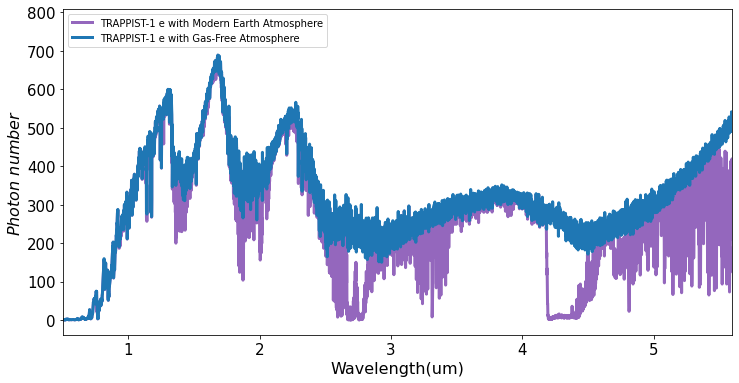

In [22]:
%matplotlib inline
plt.figure(figsize=(12, 6))
#plt.plot(wl_um_check, tbd_tra1_erg_check/(1/ang2_1.to(u.steradian)),'-',color = '#1f77b4', label='Blackbody flux we simulated',linewidth=3)
#plt.plot(sim_x, sim_y,'o',color = '#ff7f0e', label ='Data come from SIMBAD')
plt.plot(wl_um_check,pn_14e_elt,linewidth=3,color = '#9467bd',label="TRAPPIST-1 e with Modern Earth Atmosphere", )
plt.plot(wl_um_check,pn_14e_elt_nogas,linewidth=3,color = '#1f77b4' ,label="TRAPPIST-1 e with Gas-Free Atmosphere")
#plt.plot(wl_um, obd_tra1_erg,'-',color = 'red')
#plt.errorbar(wl_um_eb ,er_y,yerr= np.array(er_er2),fmt = 'o',color = '#ff7f0e')
plt.legend()
plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 16})
plt.ylabel("$Photon\ number$",fontdict={ 'size'   : 16})
plt.xlim(0.5,5.6)
#plt.ylim(0,9)
#plt.title("ELT-R150-TRA1")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 10},loc='upper left')